In [13]:
#'S종가', 'H종가', '환율', '유가종가', '유가오픈', '유가고가', '유가저가', '유가변동률', '한국기준금리', '미국기준금리', '한미기준금리차이', '반도체수출금액지수', 'SOX종가', 'SOX변동률', 'BTC종가', 'BTC변동률', '코스피종가', '코스피고가', '코스피저가', '코스피거래량', '코스피변동', '코스닥종가', '코스닥시가', '코스닥고가', '코스닥저가', '코스닥거래량', '코스닥변동', 'SP종가', 'SP변동률', '시장금리'
!pip install sklearn

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [43]:
Ldata = pd.read_csv('hynix_long.csv', encoding='UTF-8', index_col = '날짜')
Ldata.head()

,S종가,H종가,H등락률,H시가,H고가,H저가,H거래량,H거래대금,H시가총액,H상장주식수,...,H주당배당금,H배당수익률,H배당금총액,H당기순이익,H매출액증가율,H영업이익(조단위),반도체 수출금액지수,금리,WTI 현물유가등락률,원달러환율(원)
날짜,,,,,,,,,,,,,,,,,,,,,
2000,268620,17703,-0.551618,17780,18341,17207,10801089,1.770000e+11,8.670000e+12,490276394,...,0,0.0,0.0,-2.570000e+12,0.12,0.0160,40.603333,5.25,58.775000,1259.7
2001,204334,2785,0.048293,2804,2916,2693,143710787,2.780000e+11,1.790000e+12,759312395,...,0,0.0,0.0,-5.050000e+12,-0.50,-1.9100,22.136667,4.00,-14.066667,1326.1
2002,347529,955,-0.572295,966,1012,919,407824329,3.010000e+11,2.060000e+12,3420237905,...,0,0.0,0.0,-2.030000e+12,-0.11,-0.6712,26.222500,4.25,8.150000,1200.4
2003,382002,4688,0.160526,4700,4867,4556,57406618,1.040000e+11,2.360000e+12,1818367110,...,0,0.0,0.0,-2.100000e+12,0.02,0.0432,31.284167,3.75,18.675000,1197.8
2004,498382,10761,0.382972,10781,11088,10489,11116629,1.200000e+11,4.780000e+12,444434620,...,0,0.0,0.0,1.720000e+12,0.39,2.0300,41.820000,3.25,36.241667,1043.8


## 상관계수 확인

In [44]:
#a = pd.Series(Ldata['종가'])
#Ldata['종가'].iloc[1:] = np.diff(a)
#b = pd.Series(Ldata['금리'])
#Ldata['금리'].iloc[1:] = np.diff(b)
#Ldata['종가'] = np.diff(a) #Error occurt

In [45]:
#Ldata = Ldata.drop(['H금리대비', 'S등락률', 'H등락분류','H대비', 'H등락률', 'H시가', 'H고가', 'H저가', 'H거래량', 'H거래대금', 'H시가총액', 'H상장주식수'], axis=1)

In [46]:
Ldata = Ldata[['S종가', 'H종가', 'H자본금순이익률', '금리', 'H영업이익(조단위)', 'H자기자본순이익율', 'H당기순이익', '반도체 수출금액지수', 'WTI 현물유가등락률']]

In [47]:
li = ['S종가', 'H종가', 'H자본금순이익률', 'H영업이익(조단위)', 'H자기자본순이익율', 'H당기순이익', '반도체 수출금액지수']

for x in li:
    a = pd.Series(Ldata[x])
    Ldata[x].iloc[1:] = np.diff(a)

#b = pd.Series(Ldata['금리'])
#Ldata['금리'].iloc[1:] = np.diff(b)
#Ldata['종가'] = np.diff(a) #Error occurt

In [48]:
data_corr = pd.DataFrame(Ldata).corr(method='pearson')
data_corr.describe()

,S종가,H종가,H자본금순이익률,금리,H영업이익(조단위),H자기자본순이익율,H당기순이익,반도체 수출금액지수,WTI 현물유가등락률
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,0.373978,0.484096,0.534935,0.083339,0.583481,0.383198,0.575523,0.590996,0.268840
std,0.367782,0.307827,0.427763,0.424971,0.363950,0.374445,0.408986,0.300226,0.358697
min,-0.308092,-0.083058,-0.141609,-0.308092,-0.029104,-0.179687,-0.117886,0.028461,-0.090885
25%,0.249456,0.362649,0.399608,-0.141609,0.446894,0.249456,0.438123,0.417758,0.016696
50%,0.438123,0.488955,0.652061,-0.083058,0.543487,0.314993,0.680293,0.652061,0.158731
75%,0.535433,0.587688,0.884585,0.028461,0.884585,0.680293,0.948090,0.779286,0.417758
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
data_corr

,S종가,H종가,H자본금순이익률,금리,H영업이익(조단위),H자기자본순이익율,H당기순이익,반도체 수출금액지수,WTI 현물유가등락률
S종가,1.000000,0.587688,0.399608,-0.308092,0.446894,0.249456,0.438123,0.535433,0.016696
H종가,0.587688,1.000000,0.416139,-0.083058,0.543487,0.261721,0.488955,0.779286,0.362649
H자본금순이익률,0.399608,0.416139,1.000000,-0.141609,0.884585,0.715517,0.978996,0.652061,-0.090885
금리,-0.308092,-0.083058,-0.141609,1.000000,-0.029104,-0.179687,-0.117886,0.028461,0.581030
H영업이익(조단위),0.446894,0.543487,0.884585,-0.029104,1.000000,0.451861,0.948090,0.846789,0.158731
H자기자본순이익율,0.249456,0.261721,0.715517,-0.179687,0.451861,1.000000,0.680293,0.314993,-0.045376
H당기순이익,0.438123,0.488955,0.978996,-0.117886,0.948090,0.680293,1.000000,0.744182,0.018957
반도체 수출금액지수,0.535433,0.779286,0.652061,0.028461,0.846789,0.314993,0.744182,1.000000,0.417758
WTI 현물유가등락률,0.016696,0.362649,-0.090885,0.581030,0.158731,-0.045376,0.018957,0.417758,1.000000


c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1584x1584 with 0 Axes>

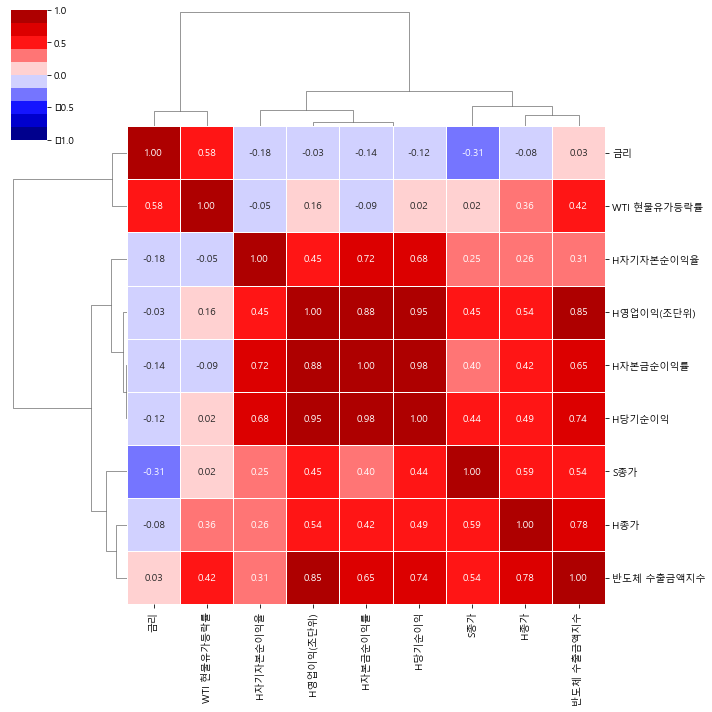

In [50]:
c = sns.color_palette("seismic", 10)
#'RdYlBu_r'
plt.figure(figsize=(22,22))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.clustermap(data_corr, annot=True,vmin = -1, 
               cbar_kws={"shrink": .5},
               vmax = 1, fmt = '.2f', linewidths=.5, cmap = c,metric="correlation")

In [16]:
df = pd.read_csv('hynix_short.csv',index_col=0,parse_dates=[0], dayfirst=False,infer_datetime_format=True,encoding='cp949')

In [17]:
df = df[['S금리대비', 'H금리대비', '코스피변동', '코스닥변동', 'S종가', 'H종가', '유가종가', '한국기준금리', 'SOX변동률', '반도체수출금액지수']]

In [18]:
data_corr = pd.DataFrame(df).corr(method='pearson')
data_corr.describe()

,S금리대비,H금리대비,코스피변동,코스닥변동,S종가,H종가,유가종가,한국기준금리,SOX변동률,반도체수출금액지수
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.210306,0.215270,0.286666,0.241655,0.165528,0.169760,0.026460,-0.051272,0.158319,0.150092
std,0.328281,0.312385,0.357630,0.348123,0.595877,0.597903,0.524931,0.615263,0.307429,0.582739
min,-0.036512,-0.008565,-0.028109,-0.018362,-0.770368,-0.760266,-0.519701,-0.770368,-0.029798,-0.729989
25%,0.004987,0.014470,0.011480,0.009927,0.016537,0.008287,-0.375709,-0.554941,0.008560,0.004395
50%,0.057328,0.068071,0.126814,0.106314,0.025607,0.029336,-0.018547,-0.024561,0.055151,0.006132
75%,0.289451,0.305514,0.477363,0.262112,0.641193,0.666820,0.000612,-0.010648,0.165373,0.633645
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1584x1584 with 0 Axes>

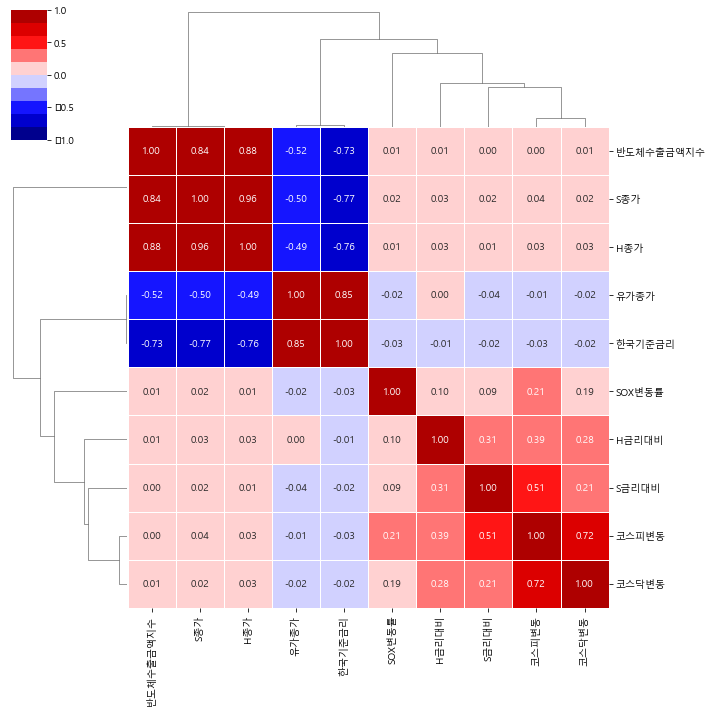

In [19]:
c = sns.color_palette("seismic", 10)
#'RdYlBu_r'
plt.figure(figsize=(22,22))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.clustermap(data_corr, annot=True,vmin = -1, 
               cbar_kws={"shrink": .5},
               vmax = 1, fmt = '.2f', linewidths=.5, cmap = c,metric="correlation")

In [7]:
a = pd.Series(df['종가'])
df['종가'].iloc[1:] = np.diff(a)
b = pd.Series(df['삼성종가'])
df['삼성종가'].iloc[1:] = np.diff(b)
#df['종가'] = np.diff(a) #Error occur

## 차원축소

In [90]:
Sdata = pd.read_csv('hynix_short.csv',index_col=0,parse_dates=[0], dayfirst=False,infer_datetime_format=True,encoding='cp949')
Sdata.head()

,S금리대비,H금리대비,S등락,H등락,H등락분류,S종가,S등락률,H종가,H대비,H등락률,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,반도체수출금액지수
date,,,,,,,,,,,,,,,,,,,,,
2010-07-19,0,1,0,1,1,795000.0,-0.87,23700.0,200,0.85,...,-0.37,498.49,494.36,499.63,494.36,506010.0,-0.08,1071.25,0.88,88.15
2010-07-20,1,1,1,1,1,798000.0,0.38,23850.0,150,0.63,...,0.28,499.72,501.32,501.64,498.43,686750.0,0.25,1083.48,0.80,88.15
2010-07-21,1,0,1,0,-1,817000.0,2.38,23600.0,-250,-1.05,...,0.69,496.73,502.63,503.08,496.73,721150.0,-0.60,1069.59,1.74,88.15
2010-07-22,0,0,0,0,-1,808000.0,-1.10,22600.0,-1000,-4.24,...,-0.76,484.72,496.47,497.84,482.97,668020.0,-2.42,1093.67,-1.40,88.15
2010-07-23,1,1,1,1,1,811000.0,0.37,23250.0,650,2.88,...,1.30,483.69,490.17,490.65,480.66,532190.0,-0.21,1102.66,1.80,88.15


In [52]:
print(Sdata.isna().sum())
print(Sdata.shape)
print(list(Sdata.columns))

S금리대비        0
H금리대비        0
S등락          0
H등락          0
H등락분류        0
S종가          0
S등락률         0
H종가          0
H대비          0
H등락률         0
H시가          0
H고가          0
H저가          0
H거래량         0
H거래대금        0
H시가총액        0
H상장주식수       0
원달러환율        0
유가종가         0
유가오픈         0
유가고가         0
유가저가         0
유가변동률        0
한국기준금리       0
미국기준금리       0
한미기준금리차이     0
정기예금환산       0
SOX종가        0
SOX변동률       0
BTC종가        0
BTC변동률       0
코스피종가        0
코스피고가        0
코스피저가        0
코스피거래량       0
코스피변동        0
코스닥종가        0
코스닥시가        0
코스닥고가        0
코스닥저가        0
코스닥거래량       0
코스닥변동        0
SP종가         0
SP변동률        0
반도체수출금액지수    0
dtype: int64
(2670, 45)
['S금리대비', 'H금리대비', 'S등락', 'H등락', 'H등락분류', 'S종가', 'S등락률', 'H종가', 'H대비', 'H등락률', 'H시가', 'H고가', 'H저가', 'H거래량', 'H거래대금', 'H시가총액', 'H상장주식수', '원달러환율', '유가종가', '유가오픈', '유가고가', '유가저가', '유가변동률', '한국기준금리', '미국기준금리', '한미기준금리차이', '정기예금환산', 'SOX종가', 'SOX변동률', 'BTC종가', 'BTC변동률', '코스피종가', '코스피고가', '코스피저가', '코스피거래량'

In [53]:
Sdata = Sdata.dropna(axis=0)

In [54]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Sdata.drop(['S등락'], axis=1))

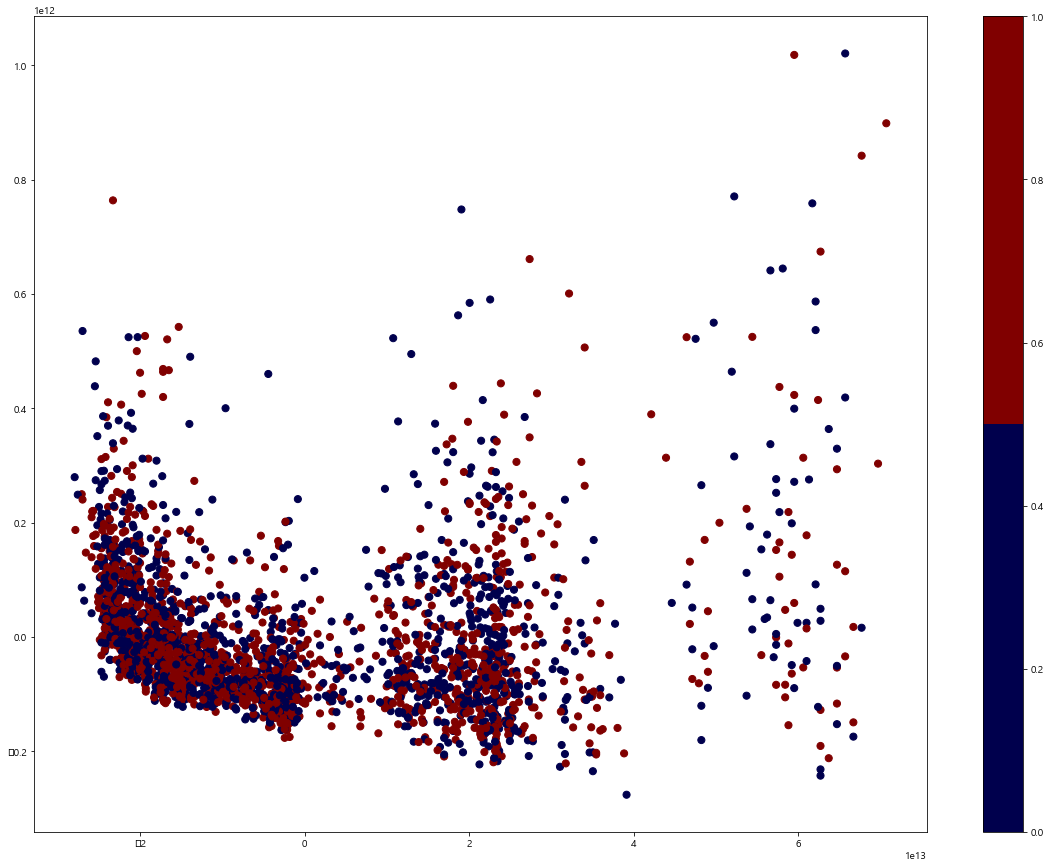

In [77]:
#cubehelix_palette = sns.cubehelix_palette(8, start=2, rot=0.2, dark=0, light=.95,reverse=True, as_cmap=True)
#cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(pca_result[:,0], pca_result[:,1], c=Sdata['S등락'], s=50, cmap=plt.cm.get_cmap('seismic', 2))
f.colorbar(points)
plt.show()

In [78]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(Sdata.drop(['S등락'], axis=1))

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


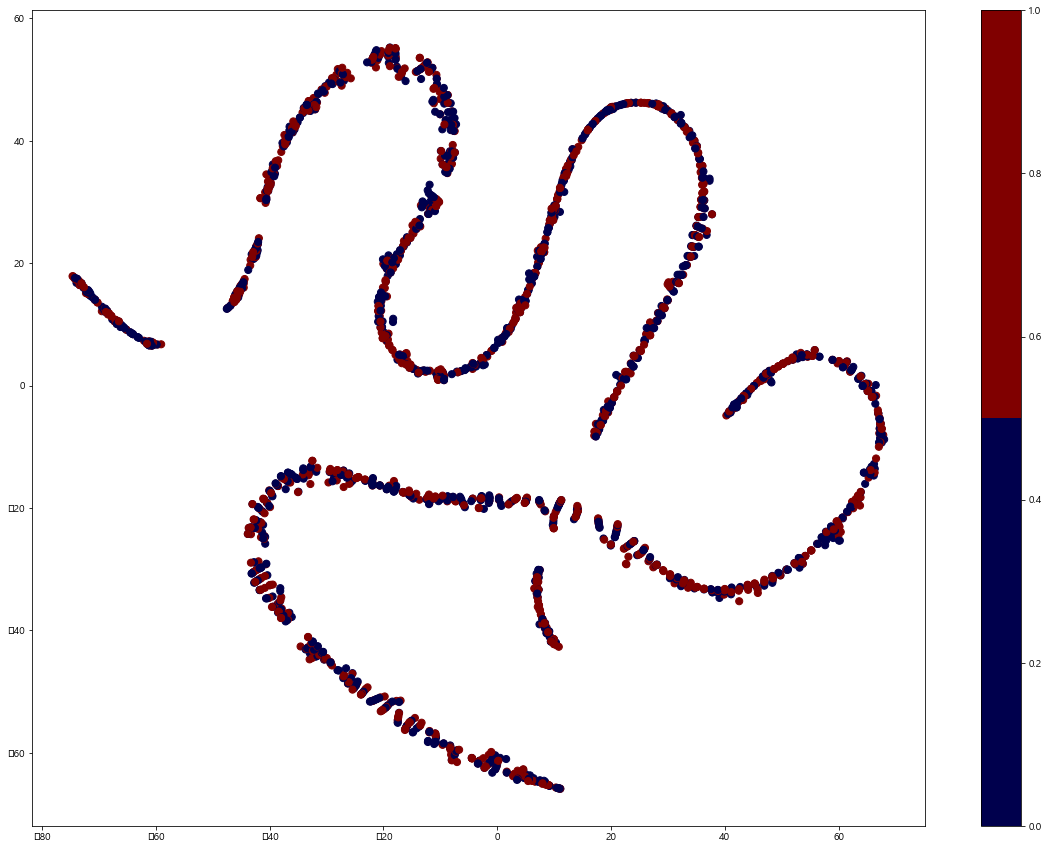

In [79]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne_result[:,0], tsne_result[:,1], c=Sdata['S등락'], s=50, cmap=plt.cm.get_cmap('seismic', 2))
f.colorbar(points)
plt.show()

## Min-Max-Scailing

In [86]:
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(Sdata)

output = min_max_scaler.transform(Sdata)
output = pd.DataFrame(output, columns = Sdata.columns, index=list(Sdata.index.values))
output.head()

,S금리대비,H금리대비,S등락,H등락,H등락분류,S종가,S등락률,H종가,H대비,H등락률,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,반도체수출금액지수
2010-07-19,0.0,1.0,0.0,1.0,0.75,0.029716,0.387358,0.060948,0.378788,0.485714,...,0.472042,0.142915,0.118507,0.110479,0.144580,0.000057,0.556193,0.007544,0.604607,0.103753
2010-07-20,1.0,1.0,1.0,1.0,0.75,0.030491,0.454889,0.062077,0.376263,0.477551,...,0.510300,0.144891,0.129934,0.113833,0.151132,0.000093,0.571975,0.011383,0.600846,0.103753
2010-07-21,1.0,0.0,1.0,0.0,0.25,0.035401,0.562939,0.060196,0.356061,0.415213,...,0.534432,0.140086,0.132084,0.116236,0.148395,0.000100,0.531325,0.007023,0.645040,0.103753
2010-07-22,0.0,0.0,0.0,0.0,0.25,0.033075,0.374932,0.052671,0.318182,0.296846,...,0.449088,0.120788,0.121971,0.107492,0.126244,0.000089,0.444285,0.014582,0.497414,0.103753
2010-07-23,1.0,1.0,1.0,1.0,0.75,0.033850,0.454349,0.057562,0.401515,0.561039,...,0.570335,0.119133,0.111627,0.095492,0.122525,0.000063,0.549976,0.017405,0.647861,0.103753


In [87]:
#output = output.drop(['S금리대비', 'H금리대비', 'S등락률', 'H등락', 'H대비', 'H등락률', 'H시가', 'H고가', 'H저가', 'H거래량', 'H거래대금', 'H시가총액', 'H상장주식수'], axis=1)

In [88]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(output.drop(['S등락'], axis=1))

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


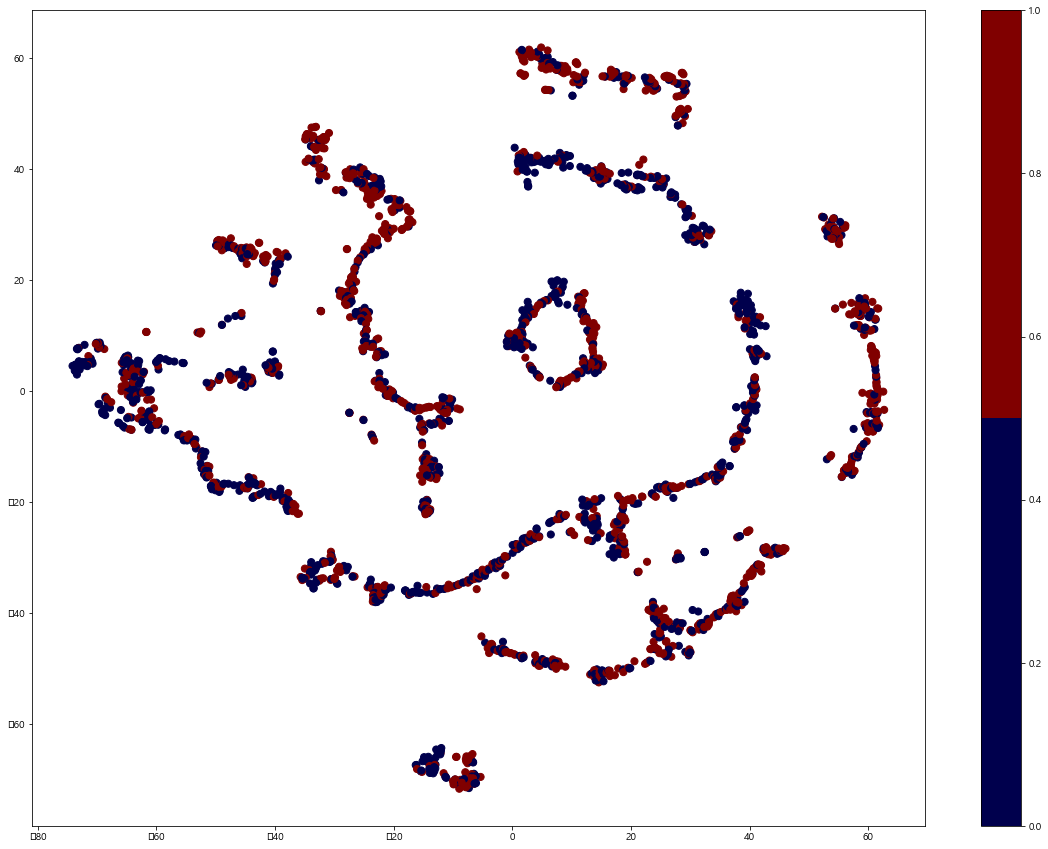

In [89]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne_result[:,0], tsne_result[:,1], c=Sdata['S등락'], s=50, cmap=plt.cm.get_cmap('seismic', 2))
f.colorbar(points)
plt.show()

## Standarization

In [91]:
std_scaler = StandardScaler()
fitted = std_scaler.fit(Sdata)

output = std_scaler.transform(Sdata)
output = pd.DataFrame(output, columns = Sdata.columns, index=list(Sdata.index.values))
output.head()

,S금리대비,H금리대비,S등락,H등락,H등락분류,S종가,S등락률,H종가,H대비,H등락률,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,반도체수출금액지수
2010-07-19,-1.002250,1.006011,-1.002250,1.006011,0.921704,-1.255654,-0.546268,-1.007034,0.117198,0.316498,...,-0.380898,-1.069705,-1.113572,-1.087852,-1.082541,-0.643528,-0.084974,-1.534862,0.772965,-0.811856
2010-07-20,0.997755,1.006011,0.997755,1.006011,0.921704,-1.251857,0.176131,-1.001720,0.081558,0.224943,...,0.241394,-1.060266,-1.060055,-1.072530,-1.050904,-0.643261,0.161294,-1.518018,0.699708,-0.811856
2010-07-21,0.997755,-0.994025,0.997755,-0.994025,-0.991943,-1.227810,1.331970,-1.010577,-0.203561,-0.474210,...,0.633917,-1.083211,-1.049982,-1.061553,-1.064119,-0.643210,-0.473031,-1.537148,1.560484,-0.811856
2010-07-22,-1.002250,-0.994025,-1.002250,-0.994025,-0.991943,-1.239200,-0.679190,-1.046003,-0.738159,-1.801767,...,-0.754273,-1.175378,-1.097348,-1.101496,-1.171080,-0.643289,-1.831234,-1.503984,-1.314876,-0.811856
2010-07-23,0.997755,1.006011,0.997755,1.006011,0.921704,-1.235403,0.170352,-1.022976,0.437956,1.161307,...,1.217914,-1.183283,-1.145790,-1.156304,-1.189036,-0.643490,-0.181988,-1.491602,1.615427,-0.811856


In [92]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(output.drop(['S등락'], axis=1))

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


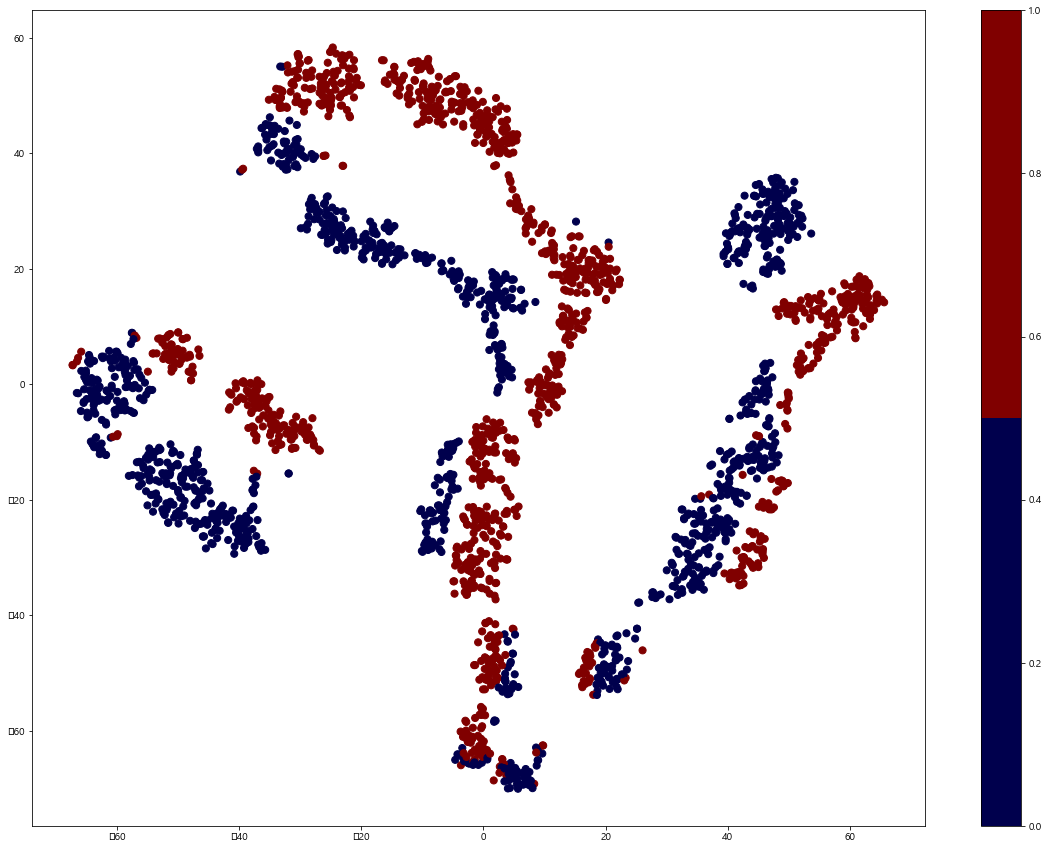

In [93]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne_result[:,0], tsne_result[:,1], c=Sdata['S등락'], s=50, cmap=plt.cm.get_cmap('seismic', 2))
f.colorbar(points)
plt.show()

## 종속변수 분포 확인

<AxesSubplot:title={'center':'등락 분류'}>

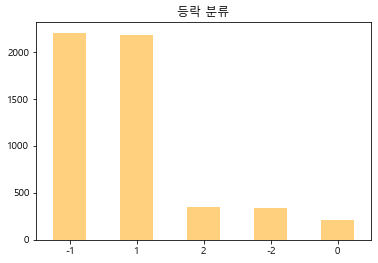

In [80]:
ax = Sdata['등락 분류'].value_counts()
ax.plot(kind='bar',  title="등락 분류", color='orange', alpha=0.5, rot=1)

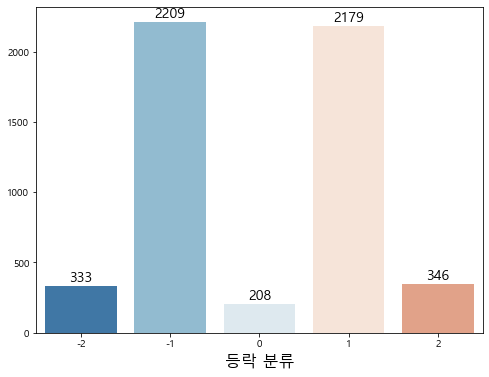

In [131]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("RdBu_r")
plots = sns.countplot(x="등락 분류", data=Sdata, palette = palette)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')


plt.xlabel("등락 분류", size=16)
plt.ylabel("", size=0)
plt.show()

## 2020년 3월 23일 포스트 코로나 종속변수 분포 확인

In [14]:
df = Sdata.loc["2020-03-23":]
df.head()

,등락지표,등락 분류,종가,대비,등락률,시가,고가,저가,거래량,거래대금,...,상장주식수,환율,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국은행기준금리,연준기준금리,한미기준금리차이
날짜,,,,,,,,,,,,,,,,,,,,,
2020-03-23,-1,-2,69400,-5400,-7.22,69700,71600,68000,8192363,5.710000e+11,...,728002365,1254.1,23.36,22.52,24.07,20.80,4.15,1.25,0.25,-1.0
2020-03-24,1,2,78700,9300,13.40,73000,78800,72100,7247345,5.490000e+11,...,728002365,1274.6,24.01,23.87,25.16,23.09,2.78,1.25,0.25,-1.0
2020-03-25,1,2,84500,5800,7.37,82000,84700,79800,8787217,7.240000e+11,...,728002365,1256.0,24.49,24.37,25.24,22.91,2.00,1.25,0.25,-1.0
2020-03-26,-1,-1,80700,-3800,-4.50,85000,87900,80400,7895289,6.660000e+11,...,728002365,1230.7,22.60,24.25,24.65,22.38,-7.72,1.25,0.25,-1.0
2020-03-27,1,1,83300,2600,3.22,85700,85700,80500,8085695,6.730000e+11,...,728002365,1227.9,21.51,23.29,23.44,20.88,-4.82,1.25,0.25,-1.0


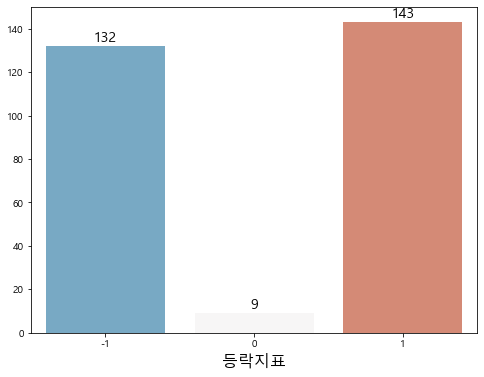

In [21]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("RdBu_r",3)
plots = sns.countplot(x="등락지표", data=df, palette = palette)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')

plt.xlabel("등락지표", size=16)
plt.ylabel("", size=0)
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46973 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s

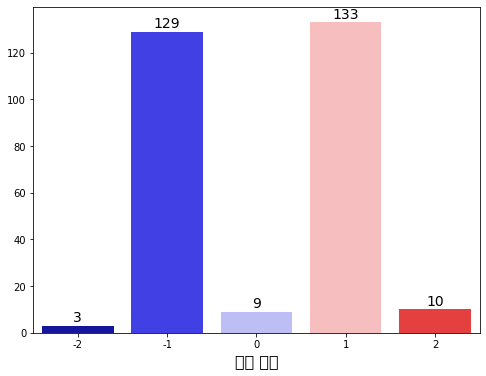

In [27]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("seismic")
plots = sns.countplot(x="등락 분류", data=df, palette = palette)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')


plt.xlabel("등락 분류", size=16)
plt.ylabel("", size=0)
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()